# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable trends
----
#### Based on the correlation shown through the scatter plots, only temperature and latitude have a strong correlation. The others are not strong enough to assume correlation with latitude.
#### According to the scatter plots, cloudiness seems to increase as you approach the equator.
#### According to the correlation, wind speed seems to slightly increase as you get further away from the equator

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# empty lists for data
new_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count_one = 0
set_one = 1

# for loop to retrieve data
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            new_city.append(city)
        else:
            count_one += 1
            new_city.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("No City Found")
print("------------------------------")  
print("Finished data")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | gerash
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | manggar
No City Found
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | rio grande
Processing Record 13 of Set 1 | asau
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | roald
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | krasnoselkup
Processing Record 20 of Set 1 | meulaboh
No City Found
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | ternate
Processing Record 23 of Set 1 | atuona
Processing Record 24 of Set 1 | cabedelo
Processin

Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | oranjemund
No City Found
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | antofagasta
Processing Record 49 of Set 4 | along
Processing Record 50 of Set 4 | inhambane
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | havoysund
No City Found
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | kargasok
Processing Record 5 of Set 5 | brae
Processing Record 6 of Set 5 | baru
Processing Record 7 of Set 5 | axim
Processing Record 8 of Set 5 | raudeberg
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | aripuana
Processing Record 11 of Set 5 | norman wells
Processing Record 12 of Set 5 | tashla
Processing Record 13 of Set 5 | nador
Processing Record 14 of Set 5 | klaksvik
Processing Record 15 of Set 5 | deputatskiy
Processing Record 16 of Set 5 | ambon
Processing Record 17 of Set 5 | high level
Processing Record 18 of Set 5 | narsaq
Pro

Processing Record 37 of Set 8 | bitkine
Processing Record 38 of Set 8 | tiznit
No City Found
Processing Record 39 of Set 8 | bathsheba
Processing Record 40 of Set 8 | abu dhabi
Processing Record 41 of Set 8 | trairi
Processing Record 42 of Set 8 | bjornevatn
No City Found
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | gambela
Processing Record 45 of Set 8 | altay
Processing Record 46 of Set 8 | pimentel
Processing Record 47 of Set 8 | salinopolis
Processing Record 48 of Set 8 | weligama
Processing Record 49 of Set 8 | yenagoa
Processing Record 50 of Set 8 | balakovo
Processing Record 1 of Set 9 | san jeronimo
No City Found
Processing Record 2 of Set 9 | kununurra
Processing Record 3 of Set 9 | constantine
Processing Record 4 of Set 9 | munchberg
Processing Record 5 of Set 9 | nakamura
Processing Record 6 of Set 9 | cherskiy
Processing Record 7 of Set 9 | ikongo
Processing Record 8 of Set 9 | davila
Processing Record 9 of Set 9 | dayong
Processing Record 10 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# put data into df
weather_data = {
    "City":new_city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

weather_dataframe = pd.DataFrame(weather_data)

weather_dataframe.to_csv(output_data_file)

weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,14,PF,1666724630,75,-23.1203,-134.9692,72.81,19.30
1,albany,98,US,1666724597,90,42.6001,-73.9662,71.26,3.00
2,lompoc,28,US,1666724455,60,34.6391,-120.4579,77.85,4.00
3,grand gaube,100,US,1666724631,35,38.8755,-109.5012,47.95,1.70
4,busselton,19,AU,1666724631,86,-33.6500,115.3333,51.76,1.81


In [13]:
# Testing humidity
test_statistics = weather_dataframe["Humidity"].describe(include = "all")
print("There are no cities where humidity is > 100%")
test_statistics

There are no cities where humidity is > 100%


count    559.000000
mean      70.939177
std       21.530920
min       13.000000
25%       60.000000
50%       76.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\victo\AppData\Local\Temp\ipykernel_12040\1778055692.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


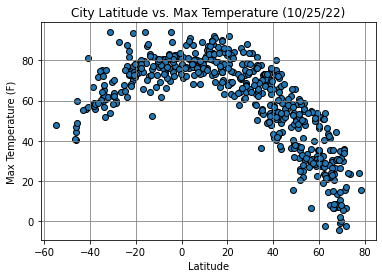

As latitude reaches 0, temperature rises
This shows that as you approach the equator, temperature rises


In [27]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature (10/25/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("../output_data/fig1.png")
plt.show()

print("As latitude reaches 0, temperature rises")
print("This shows that as you approach the equator, temperature rises")

## Latitude vs. Humidity Plot

C:\Users\victo\AppData\Local\Temp\ipykernel_12040\4096998989.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


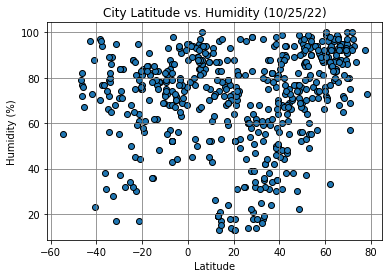

Humidity seems to remain high regardless of latitude
Humidity does vary more outside of the equator


In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (10/25/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("../output_data/fig2.png")
plt.show()

print("Humidity seems to remain high regardless of latitude")
print("Humidity does vary more outside of the equator")

## Latitude vs. Cloudiness Plot

C:\Users\victo\AppData\Local\Temp\ipykernel_12040\29497891.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


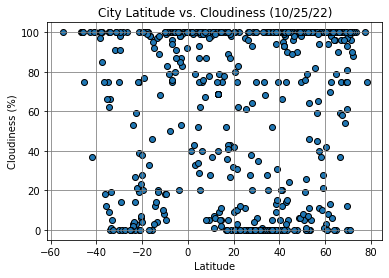

Latitude does not seem to have a large effect on cloudiness
There seem to be more clouds around -10 to 10 latitude


In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness (10/25/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("../output_data/fig3.png")
plt.show()

print("Latitude does not seem to have a large effect on cloudiness")
print("There seem to be more clouds around -10 to 10 latitude")

## Latitude vs. Wind Speed Plot

C:\Users\victo\AppData\Local\Temp\ipykernel_12040\3021660986.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")


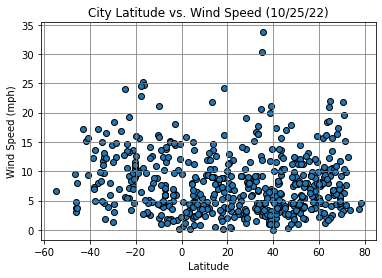

Regardless of Latitude, wind speeds seem to remain low
Wind speeds do seem to get higher as the latitude moves away from 0


In [30]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (10/25/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("../output_data/fig4.png")
plt.show()

print("Regardless of Latitude, wind speeds seem to remain low")
print("Wind speeds do seem to get higher as the latitude moves away from 0")

## Linear Regression

In [18]:
# separating hemispheres into different df
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8690845452273921


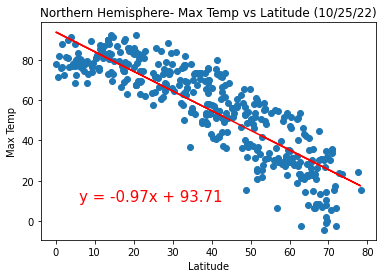

There is a strong negative correlation between latitude and max temp for northern hemispheres
As you move north from the equator, temperatures decrease


In [31]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere- Max Temp vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a strong negative correlation between latitude and max temp for northern hemispheres")
print("As you move north from the equator, temperatures decrease")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.692664160861912


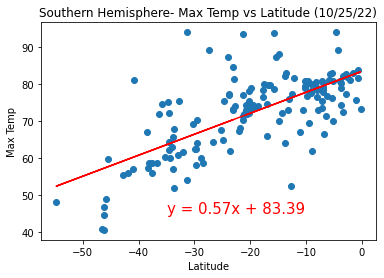

There is a strong positive correlation between latitude and max temp in the southern hemisphere
This shows that as you move towards the equator from the south, temperature rises


In [32]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere- Max Temp vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(-35,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a strong positive correlation between latitude and max temp in the southern hemisphere")
print("This shows that as you move towards the equator from the south, temperature rises")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2883962511166131


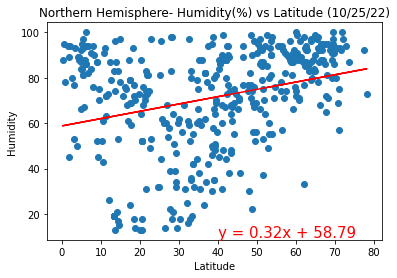

There is a very weak positive correlation between latitude and humidity for northern hemispheres
As you move north from the equator, humidity increases slightly


In [33]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere- Humidity(%) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a very weak positive correlation between latitude and humidity for northern hemispheres")
print("As you move north from the equator, humidity increases slightly")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06740326774725496


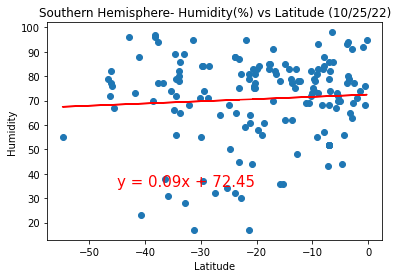

There is a very weak positive correlation between latitude and humidity in the southern hemisphere
This shows that as you move towards the equator from the south, humidity rises slightly


In [34]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere- Humidity(%) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a very weak positive correlation between latitude and humidity in the southern hemisphere")
print("This shows that as you move towards the equator from the south, humidity rises slightly")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1376687531927479


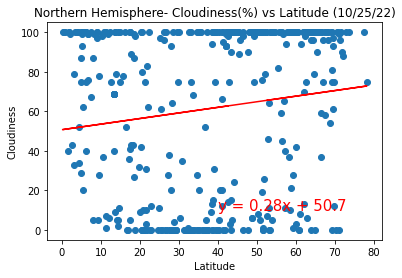

There is a very weak positive correlation between latitude and cloudiness for northern hemispheres
As you move north from the equator, cloudiness increases slightly


In [35]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere- Cloudiness(%) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a very weak positive correlation between latitude and cloudiness for northern hemispheres")
print("As you move north from the equator, cloudiness increases slightly")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16279567988804103


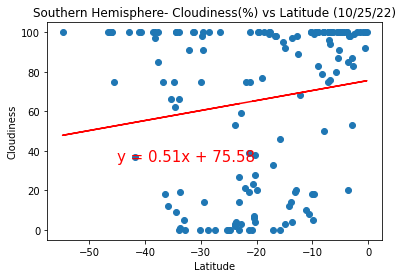

There is a very weak positive correlation between latitude and cloudiness in the southern hemisphere
This shows that as you move towards the equator from the south, cloudiness rises slightly


In [36]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere- Cloudiness(%) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a very weak positive correlation between latitude and cloudiness in the southern hemisphere")
print("This shows that as you move towards the equator from the south, cloudiness rises slightly")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12100091723254155


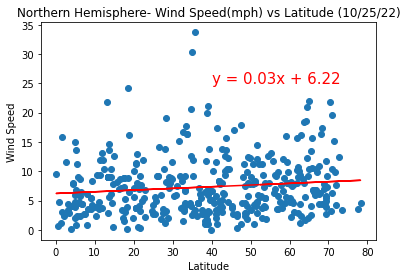

There is a weak positive correlation between latitude and wind speed for northern hemispheres
As you move north from the equator, wind speed increases


In [37]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere- Wind Speed(mph) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a weak positive correlation between latitude and wind speed for northern hemispheres")
print("As you move north from the equator, wind speed increases")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12321141189907703


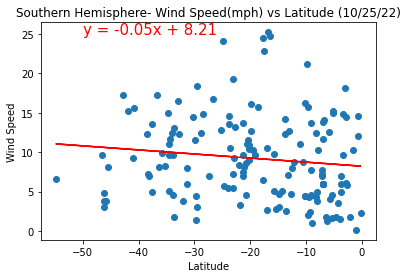

There is a weak negative correlation between latitude and wind speed for southern hemispheres
As you move north towards the equator, wind speed decreases


In [38]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
fit = x_values * slope  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere- Wind Speed(mph) vs Latitude (10/25/22)")
plt.plot(x_values, fit, color = "red")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {r_value}")
plt.show()

print("There is a weak negative correlation between latitude and wind speed for southern hemispheres")
print("As you move north towards the equator, wind speed decreases")